Personally, i've never been a fan or follower of Star Wars. I've never understood why this part of American culture gets so much love.

THAT BEING SAID...

We are here to explore FiveThirtyEIght's survey so we can make it nice and tidy.

In [1]:
#First things first, import the data. Note some characters aren't in default utf-8
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
star_wars = pd.read_csv('star_wars.csv',encoding='ISO-8859-1')

In [2]:
#let's look at the first few rows
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

This table contains lots of data that isn't very clear or properly filled. Some of  the column names could also use some trimming to make reading easier. 

In [3]:
#look at dataframe dimension
star_wars.shape

(1187, 38)

In [4]:
#look at columns of dataset
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [5]:
star_wars.iloc[0]

RespondentID                                                                                                                                                                              NaN
Have you seen any of the 6 films in the Star Wars franchise?                                                                                                                         Response
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                                                                Response
Which of the following Star Wars films have you seen? Please select all that apply.                                                                  Star Wars: Episode I  The Phantom Menace
Unnamed: 4                                                                                                                                        Star Wars: Episode II  Attack of the Clones
Unnamed: 5                                        

In [6]:
#remove any rows where Respondent ID is missing
star_wars = star_wars[star_wars['RespondentID'].notnull()]

In [7]:
#look at dataframe dimension again
star_wars.shape

(1186, 38)

**OBSERVATION**: It appears there was only **one** entry with a missing Respondent ID, which was the first row of the dataset.

In [8]:
yes_no = {'Yes':True,'No':False}

We make the 2nd and 3rd columns a sub-list so we can apply the boolean function to them.

In [9]:
second_third_column = ['Have you seen any of the 6 films in the Star Wars franchise?','Do you consider yourself to be a fan of the Star Wars film franchise?']

In [10]:
for c in second_third_column:
    star_wars[c]=star_wars[c].map(yes_no)

In [11]:
print(star_wars.head())

   RespondentID  Have you seen any of the 6 films in the Star Wars franchise?  \
1  3.292880e+09                                               True              
2  3.292880e+09                                              False              
3  3.292765e+09                                               True              
4  3.292763e+09                                               True              
5  3.292731e+09                                               True              

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
1                                               True                      
2                                                NaN                      
3                                              False                      
4                                               True                      
5                                               True                      

  Which of the following Star Wars films have you seen? Please

I just want to quickly check the value counts ini both columns.

In [12]:
star_wars.iloc[:,1].value_counts(dropna=False)

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [13]:
star_wars.iloc[:,2].value_counts(dropna=False)

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

Now we clean up the first respondent columns

In [14]:
star_wars.iloc[:,3:9].head(1)

,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
1,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi


In [15]:
dic_map={"Star Wars: Episode I  The Phantom Menace": True, 'Star Wars: Episode II  Attack of the Clones': True,'Star Wars: Episode III  Revenge of the Sith': True, 'Star Wars: Episode IV  A New Hope': True, 'Star Wars: Episode V The Empire Strikes Back': True,'Star Wars: Episode VI Return of the Jedi': True,np.NaN: False}

In [16]:
star_wars.iloc[:,4].value_counts(dropna=False)

NaN                                            615
Star Wars: Episode II  Attack of the Clones    571
Name: Unnamed: 4, dtype: int64

In [17]:
for col in star_wars.columns[3:9]:
    star_wars[col]=star_wars[col].map(dic_map)

In [18]:
print(star_wars.iloc[:,0:9].head())

   RespondentID  Have you seen any of the 6 films in the Star Wars franchise?  \
1  3.292880e+09                                               True              
2  3.292880e+09                                              False              
3  3.292765e+09                                               True              
4  3.292763e+09                                               True              
5  3.292731e+09                                               True              

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
1                                               True                      
2                                                NaN                      
3                                              False                      
4                                               True                      
5                                               True                      

   Which of the following Star Wars films have you seen? Pleas

In [19]:
star_wars = star_wars.rename(columns={"Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",'Unnamed: 4':'seen_2','Unnamed: 5':'seen_3','Unnamed: 6':'seen_4', 'Unnamed: 7':'seen_5', 'Unnamed: 8':'seen_6'})
star_wars.iloc[:,0:10].head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.
1,3.292880e+09,True,True,True,True,True,True,True,True,3
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN
3,3.292765e+09,True,False,True,True,True,False,False,False,1
4,3.292763e+09,True,True,True,True,True,True,True,True,5
5,3.292731e+09,True,True,True,True,True,True,True,True,5
6,3.292719e+09,True,True,True,True,True,True,True,True,1
7,3.292685e+09,True,True,True,True,True,True,True,True,6
8,3.292664e+09,True,True,True,True,True,True,True,True,4
9,3.292654e+09,True,True,True,True,True,True,True,True,5
10,3.292640e+09,True,False,False,True,False,False,False,False,1


The columns from 9 to 14 inclusive ask the respondent to rank the Star Wars movies in order of most favorite to least favorite (from 1 to 6). Each column represents a movies, according to the scheme below:

In [20]:
star_wars[star_wars.columns[9:15]]=star_wars[star_wars.columns[9:15]].astype(float)

In [21]:
star_wars = star_wars.rename(columns={"Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",'Unnamed: 10':'ranking_2','Unnamed: 11':'ranking_3','Unnamed: 12':'ranking_4', 'Unnamed: 13':'ranking_5','Unnamed: 14':'ranking_6'})
star_wars.iloc[:,0:15].head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,2.0,1.0,4.0,5.0,6.0
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,2.0,3.0,4.0,5.0,6.0
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,6.0,1.0,2.0,4.0,3.0
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,4.0,6.0,2.0,1.0,3.0
6,3.292719e+09,True,True,True,True,True,True,True,True,1.0,4.0,3.0,6.0,5.0,2.0
7,3.292685e+09,True,True,True,True,True,True,True,True,6.0,5.0,4.0,3.0,1.0,2.0
8,3.292664e+09,True,True,True,True,True,True,True,True,4.0,5.0,6.0,3.0,2.0,1.0
9,3.292654e+09,True,True,True,True,True,True,True,True,5.0,4.0,6.0,2.0,1.0,3.0
10,3.292640e+09,True,False,False,True,False,False,False,False,1.0,2.0,3.0,4.0,5.0,6.0


In [22]:
star_wars_mean_rankings=star_wars.iloc[:,9:15].mean()
star_wars_mean_rankings

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

In [23]:
%matplotlib inline

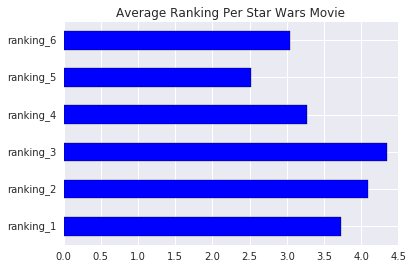

In [24]:
star_wars_mean_rankings.plot.barh(rot=0,color='blue',title='Average Ranking Per Star Wars Movie')

From the chart above, we can see that Star Wars V- The Empire Strikes Back is the hightet rated movie of the series, followed by Star Wars 6.

Now, we want to see how many people watched each of these movies. This of course will affect the ratinngs.

In [25]:
seen_set = star_wars.iloc[:,3:9].sum()
seen_set

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

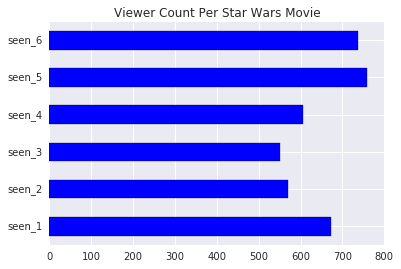

In [26]:
seen_set.plot.barh(rot=0,color='blue',title='Viewer Count Per Star Wars Movie')

Well, well well. 
It appears the two most popular movies are also the most watched.
It is a common trend for most star wars fans to prefer the older movies.

So we want to see the differences between male and female opinions from the same data. Let's split them up.

In [27]:
males = star_wars[star_wars["Gender"] == "Male"]

In [28]:
females = star_wars[star_wars["Gender"] == "Female"]

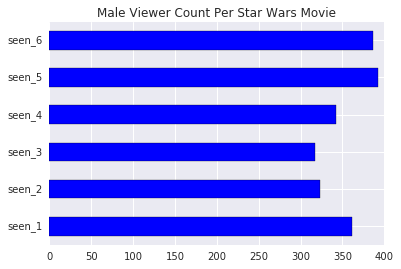

In [29]:
males.iloc[:,3:9].sum().plot(kind='barh',rot=0,color='blue',title='Male Viewer Count Per Star Wars Movie')

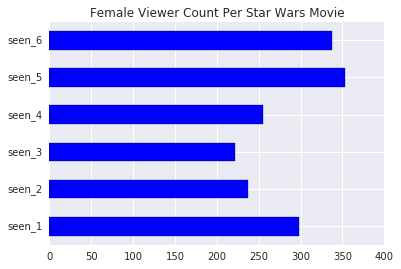

In [30]:
females.iloc[:,3:9].sum().plot(kind='barh',rot=0,color='blue',title='Female Viewer Count Per Star Wars Movie')

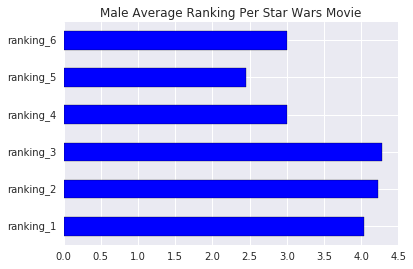

In [31]:
males.iloc[:,9:15].mean().plot.barh(rot=0,color='blue',title='Male Average Ranking Per Star Wars Movie')

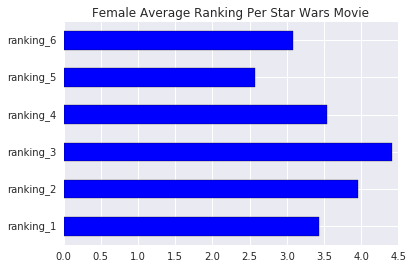

In [32]:
females.iloc[:,9:15].mean().plot.barh(rot=0,color='blue',title='Female Average Ranking Per Star Wars Movie')

In [33]:
len(males)

497

In [34]:
len(females)

549

In [35]:
star_wars['Gender'].value_counts()

Female    549
Male      497
Name: Gender, dtype: int64

In the code above, i just wanted to check how many men vs women filled the survey. Curious.

From analyzing the bar graphs, we can see that, by a close margin in views, Star Wars: Episode V The Empire Strikes Bacm is the most viwed and highest ranked movie of the star wars franchise among males AND Females.